# colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/github/ids

/content/drive/MyDrive/github/ids


# git

In [4]:
!git status

Refresh index: 100% (9/9), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   colab.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [5]:
!git add colab.ipynb

In [7]:
!git commit -m "colab.ipynb"

[main 02b35a6] colab.ipynb
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite colab.ipynb (93%)


In [8]:
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 4.60 KiB | 673.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/pro1710/ids.git
   c617ea6..02b35a6  main -> main


# code

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
%matplotlib inline

In [10]:
import importlib
import ids_common
importlib.reload(ids_common)

<module 'ids_common' from '/content/drive/MyDrive/github/ids/ids_common.py'>

In [11]:
path_to_dataset = './dataset/ML-EdgeIIoT-dataset.csv'
df = pd.read_csv(path_to_dataset, low_memory=False)

In [13]:


to_drop_columns = ['frame.time',
                'ip.src_host',
                'ip.dst_host',
                'arp.src.proto_ipv4',
                'arp.dst.proto_ipv4',
                'http.file_data',
                'http.request.full_uri',
                'icmp.transmit_timestamp',
                'http.request.uri.query',
                'tcp.options',
                'tcp.payload',
                'tcp.srcport',
                'tcp.dstport',
                'udp.port',
                'mqtt.msg']


to_drop_1_unique = ['icmp.unused',
                    'http.tls_port',
                    'dns.qry.type',
                    'dns.retransmit_request_in',
                    'mqtt.msg_decoded_as',
                    'mbtcp.len',
                    'mbtcp.trans_id',
                    'mbtcp.unit_id',
                    'mqtt.conack.flags']


to_fix_columns = ['mqtt.topic',
                'mqtt.protoname',
                'dns.qry.name.len',
                'http.request.method',
                'http.referer',
                'http.request.version']


# to drop
# dns.qry.name.len
# dns.retransmit_request


# df.loc[(df['dns.qry.name.len'] == '0') | (df[col] == '0x00000000'), col] = '0'

#######################################

for col in to_fix_columns:
    df.loc[(df[col] == '0.0') | (df[col] == '0x00000000'), col] = '0.0'
    # encode_text_dummy(df, col)

stats = []

for col in df.columns:
    uniques = df[col].unique()
    num_uniques = len(uniques)
    stats.append((col, df[col].dtype, num_uniques))

print(f'SHAPE: {df.shape}')

num_rows = df.shape[0]

for i, sts in enumerate(sorted(stats, key=lambda x: x[2])):
    c, t, u = sts
    dropped = '------------'
    if c in to_drop_columns:
        dropped = 'to_drop_columns'
        continue
    elif c in to_drop_1_unique:
        dropped = 'to_drop_1_unique'
        continue


    print(f'{i:<4}{c:<32}{str(t):<12}{u:>6} [{dropped:^24}]')

    if u < 10:
        # val_count = df[c].value_counts().sort_values()
        val_count = df.groupby('Attack_label')[c].value_counts()
        print(val_count)
    print('-'*80)

SHAPE: (157800, 63)
8   arp.hw.size                     float64          2 [      ------------      ]
Attack_label  arp.hw.size
0             0.0             24259
              6.0                42
1             0.0            131967
              6.0              1532
Name: arp.hw.size, dtype: int64
--------------------------------------------------------------------------------
9   http.response                   float64          2 [      ------------      ]
Attack_label  http.response
0             0.0               24301
1             0.0              126280
              1.0                7219
Name: http.response, dtype: int64
--------------------------------------------------------------------------------
10  tcp.connection.fin              float64          2 [      ------------      ]
Attack_label  tcp.connection.fin
0             0.0                    21701
              1.0                     2600
1             0.0                   126924
              1.0               

In [ ]:

def prepare_dataset_new(path_to_dataset):

    df  = pd.read_csv(path_to_dataset, low_memory=False)

    to_drop_columns = ['frame.time',
                'ip.src_host',
                'ip.dst_host',
                'arp.src.proto_ipv4',
                'arp.dst.proto_ipv4',
                'http.file_data',
                'http.request.full_uri',
                'icmp.transmit_timestamp',
                'http.request.uri.query',
                'tcp.options',
                'tcp.payload',
                'tcp.srcport',
                'tcp.dstport',
                'udp.port',
                'mqtt.msg']

    df.drop(to_drop_columns, axis=1, inplace=True)
    print(f'drop: NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )

    to_drop_1_unique = ['icmp.unused',
                    'http.tls_port',
                    'dns.qry.type',
                    'dns.retransmit_request_in',
                    'mqtt.msg_decoded_as',
                    'mbtcp.len',
                    'mbtcp.trans_id',
                    'mbtcp.unit_id',
                    'mqtt.conack.flags']

    df.drop(to_drop_1_unique, axis=1, inplace=True)
    print(f'drop: NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )

    df.dropna(axis=0, how='any', inplace=True)
    print(f'dropna: NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )

    to_fix_columns = ['mqtt.topic',
                    #   'mqtt.conack.flags',
                      'mqtt.protoname',
                      'dns.qry.name.len',
                      'http.request.method',
                      'http.referer',
                      'http.request.version']

    for col in to_fix_columns:
        df.loc[(df[col] == '0.0') | (df[col] == '0x00000000'), col] = '0'
        encode_text_dummy(df, col)


    df.drop_duplicates(subset=None, keep='first', inplace=True)
    print(f'drop_duplicates: NA: {df.isnull().sum().sum()}, DUPS: {df.duplicated().sum()}', )

    df['Attack_type'] = df['Attack_type'].astype('category')

    print('#'*80)
    print('TARGET: "Attack_label"')
    print(df['Attack_label'].value_counts())
    print('-'*80)
    print('TARGET: "Attack_type"')
    print(df['Attack_type'].value_counts())
    print('#'*80)

    return df

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

SEED = random.randint(0, 42424242)
SEED = 42
print(f'SEED = {SEED}')

target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'

def dataset_split(dataset, target):
    y = dataset[target]
    X = dataset.drop([target_label_2_class, target_label_15_class], axis=1, inplace=False)
    return train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)


def report(y_train, y_train_predict, y_test, y_test_predict):

    print('TRAIN:')
    print(classification_report(y_train, y_train_predict))

    print('TEST:')
    print(classification_report(y_test, y_test_predict))

SEED = 42


# ver 0.0

``` python
target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
```

drop: NA: 0, DUPS: 5604
drop: NA: 0, DUPS: 5604
dropna: NA: 0, DUPS: 5604
drop_duplicates: NA: 0, DUPS: 0
################################################################################
TARGET: "Attack_label"
1    128095
0     24101
Name: Attack_label, dtype: int64
--------------------------------------------------------------------------------
TARGET: "Attack_type"
Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64
################################################################################
TRAIN:
              precision    recall  f1-score  

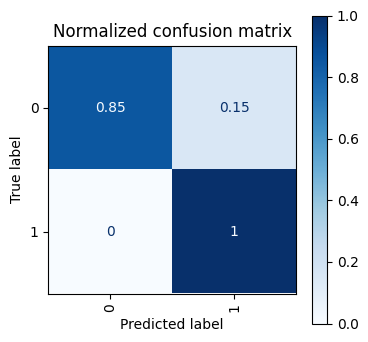

In [21]:
df  = ids_common.prepare_dataset(path_to_dataset)

X_train, X_test, y_train, y_test = dataset_split(df, target_label_2_class)

if False:
    tree_param = {'criterion':['gini','entropy', 'log_loss'],
                'max_depth':[4,5,6,7,8,16,32,48,64,80,96,124,148]}

    dt_cls = DecisionTreeClassifier(random_state=SEED)
    grid_search = GridSearchCV(cls, tree_param)

    grid_search.fit(X_train, y_train)

    print('Tuned:')
    print('Parms: ', grid_search.best_params_)
    print('Score:', grid_search.best_score_)

    dt_cls = grid_search.best_estimator_
else:
    best_params = {'criterion': 'entropy', 'max_depth': 8}
    dt_cls = DecisionTreeClassifier(**best_params, random_state=SEED)

dt_cls.fit(X_train, y_train)
y_train_predict = dt_cls.predict(X_train)
y_test_predict = dt_cls.predict(X_test)

report(y_train, y_train_predict, y_test, y_test_predict)

title='Normalized confusion matrix'

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict,
    # display_labels=Attack_type_classes,
    cmap=plt.cm.Blues,
    normalize='true',
)
disp.ax_.set_title(title)
disp.figure_.set_size_inches(4, 4, forward=True)
plt.xticks(rotation=90)
plt.show()